In [1]:
import sys

sys.path.append("C:\\Users\\Gabija\\anaconda3\\Lib\\site-packages")
import nb_black

%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from IPython.display import Image
import myfunctions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from csv import QUOTE_NONNUMERIC, QUOTE_NONE

%matplotlib inline
import warnings


from sklearn import set_config
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score,
    classification_report,
    accuracy_score,
    roc_curve,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

set_config(transform_output="pandas")

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print("Setup complete")

Setup complete


<IPython.core.display.Javascript object>

## Installments Payments Table Analysis

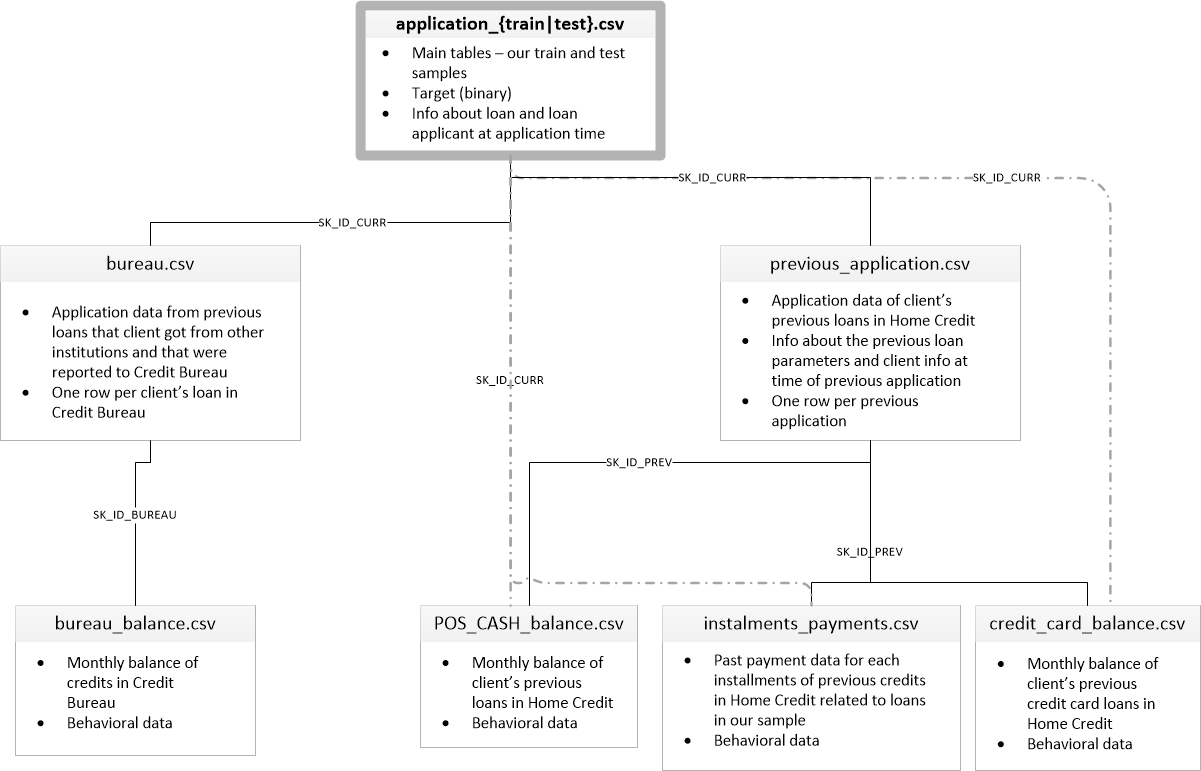

<IPython.core.display.Javascript object>

In [3]:
Image(filename="home_credit.png")

In [3]:
columns_description = pd.read_csv(
    "HomeCredit_columns_description.csv",
    encoding="latin-1",
    usecols=["Table", "Row", "Description"],
)
columns_description.style.set_properties(subset=["Description"], **{"width": "1000px"})

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
5,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has
7,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client
8,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan
9,application_{train|test}.csv,AMT_ANNUITY,Loan annuity


<IPython.core.display.Javascript object>

* Repayment history for the previously disbursed credits in Home Credit related to
the loans in our sample.
* There is a) one row for every payment that was made plus b) one row each for
missed payment.
* One row is equivalent to one payment of one installment OR one installment
corresponding to one payment of one previous Home Credit credit related to loans
in our sample.

In [4]:
ip = pd.read_csv("installments_payments.csv")
ip = myfunctions.reduce_mem_usage(ip)
print("Size of installments payments table", ip.shape)
ip.head()

Size of installments payments table (13605401, 8)


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961


<IPython.core.display.Javascript object>

In [6]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int32  
 1   SK_ID_CURR              int32  
 2   NUM_INSTALMENT_VERSION  float16
 3   NUM_INSTALMENT_NUMBER   int16  
 4   DAYS_INSTALMENT         float16
 5   DAYS_ENTRY_PAYMENT      float16
 6   AMT_INSTALMENT          float32
 7   AMT_PAYMENT             float32
dtypes: float16(3), float32(2), int16(1), int32(2)
memory usage: 311.4 MB


<IPython.core.display.Javascript object>

In [8]:
ip.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,13605401.0,1.360540e+07,13605401.0,13602496.0,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,NaN,1.887090e+01,NaN,NaN,1.705092e+04,1.723821e+04
std,5.362029e+05,1.027183e+05,0.0,2.666407e+01,NaN,NaN,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.0,1.000000e+00,-2922.0,-4920.0,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.0,4.000000e+00,-1654.0,-1662.0,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.0,8.000000e+00,-818.0,-827.0,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.0,1.900000e+01,-361.0,-370.0,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,178.0,2.770000e+02,-1.0,-1.0,3.771488e+06,3.771488e+06


<IPython.core.display.Javascript object>

In [9]:
myfunctions.single_value_features(ip)

[]

<IPython.core.display.Javascript object>

In [10]:
myfunctions.missing_values_summary(ip)

There are 2 columns that have missing values.


,Missing Values,% of Total Values,type
DAYS_ENTRY_PAYMENT,2905,0.0214,float16
AMT_PAYMENT,2905,0.0214,float32


<IPython.core.display.Javascript object>

In [12]:
# single client example:
ip[ip["SK_ID_CURR"] == 363914]

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
7662303,2582071,363914,0.0,75,-1875.0,-1887.0,3.375000e+03,3.375000e+03
7684554,2582071,363914,0.0,61,-2088.0,-2108.0,3.375000e+03,3.375000e+03
7712117,2582071,363914,0.0,103,-1449.0,-1459.0,3.375000e+03,3.375000e+03
7768175,2582071,363914,0.0,58,-2156.0,-2156.0,1.125000e+03,1.125000e+03
7774066,1380929,363914,1.0,1,-678.0,-681.0,3.211520e+04,3.211520e+04
7781768,2582071,363914,0.0,104,-1459.0,-1459.0,1.125000e+03,1.125000e+03
7788089,2411796,363914,1.0,2,-1217.0,-1255.0,2.205562e+04,2.205562e+04
7810182,2582071,363914,0.0,110,-1375.0,-1375.0,1.125000e+03,1.125000e+03
7816279,2627928,363914,1.0,5,-91.0,-101.0,1.169734e+04,1.169734e+04
7818571,2582071,363914,0.0,154,-233.0,-255.0,2.250000e+03,2.250000e+03


<IPython.core.display.Javascript object>

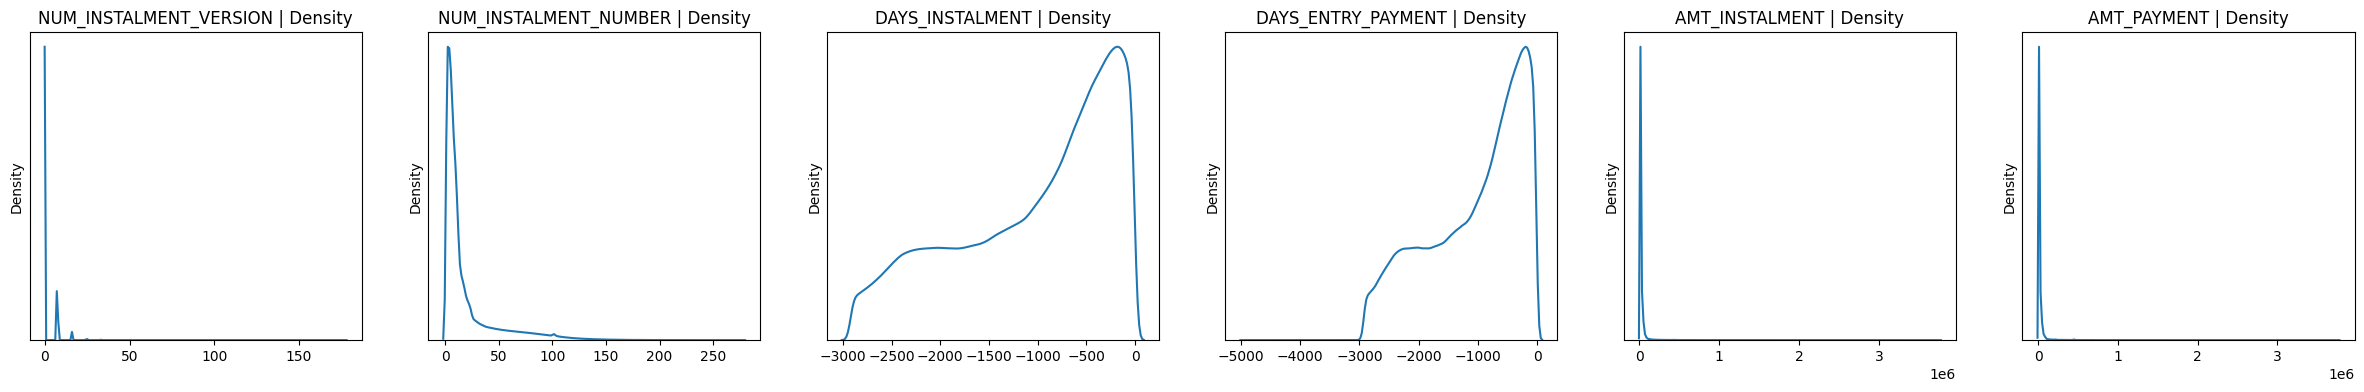

<IPython.core.display.Javascript object>

In [4]:
myfunctions.ip_plot_kde_density(ip)

In [5]:
# create additional features:
transform_ip = FunctionTransformer(myfunctions.ip_new_features)
aggregate_ip = Pipeline(steps=[("aggregate_new", transform_ip)])
ip_agg = aggregate_ip.fit_transform(ip)
print(ip_agg.shape)
ip_agg.head()

INSTALLMENTS PAYMENTS SHAPE: (339587, 15)
(339587, 15)


,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MIN,INS_NUM_INSTALMENT_NUMBER_MAX,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_NEW_PAYMENT_PERCENT,INS_NEW_PAYMENT_DIFF
SK_ID_CURR,,,,,,,,,,,,,,,
100001,2,1,4,-2916.0,-1619.0,-2187.714355,-2916.0,-1628.0,-2195.142822,5885.132324,4.119593e+04,5885.132324,4.119593e+04,1.0,0.0
100002,2,1,19,-565.0,-25.0,-295.000000,-587.0,-49.0,-315.421051,11559.247070,2.196257e+05,11559.247070,2.196257e+05,1.0,0.0
100003,2,1,12,-2310.0,-536.0,-1378.160034,-2324.0,-544.0,-1385.359985,64754.585938,1.618865e+06,64754.585938,1.618865e+06,1.0,0.0
100004,2,1,3,-784.0,-724.0,-754.000000,-795.0,-727.0,-761.666687,7096.154785,2.128846e+04,7096.154785,2.128846e+04,1.0,0.0
100005,2,1,9,-706.0,-466.0,-586.000000,-736.0,-470.0,-609.555542,6240.205078,5.616184e+04,6240.205078,5.616184e+04,1.0,0.0


<IPython.core.display.Javascript object>

In [10]:
# getting "TARGET" column from application_train table:
application_train = pd.read_csv("application_train.csv")
application_train = myfunctions.reduce_mem_usage(application_train)

<IPython.core.display.Javascript object>

In [11]:
ip_target = pd.merge(
    ip_agg, application_train[["SK_ID_CURR", "TARGET"]], how="left", on="SK_ID_CURR"
)
ip_target.head()

,SK_ID_CURR,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MIN,INS_NUM_INSTALMENT_NUMBER_MAX,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_NEW_PAYMENT_PERCENT,INS_NEW_PAYMENT_DIFF,TARGET
0,100001,2,1,4,-2916.0,-1619.0,-2187.714355,-2916.0,-1628.0,-2195.142822,5885.132324,4.119593e+04,5885.132324,4.119593e+04,1.0,0.0,NaN
1,100002,2,1,19,-565.0,-25.0,-295.000000,-587.0,-49.0,-315.421051,11559.247070,2.196257e+05,11559.247070,2.196257e+05,1.0,0.0,1.0
2,100003,2,1,12,-2310.0,-536.0,-1378.160034,-2324.0,-544.0,-1385.359985,64754.585938,1.618865e+06,64754.585938,1.618865e+06,1.0,0.0,0.0
3,100004,2,1,3,-784.0,-724.0,-754.000000,-795.0,-727.0,-761.666687,7096.154785,2.128846e+04,7096.154785,2.128846e+04,1.0,0.0,0.0
4,100005,2,1,9,-706.0,-466.0,-586.000000,-736.0,-470.0,-609.555542,6240.205078,5.616184e+04,6240.205078,5.616184e+04,1.0,0.0,NaN


<IPython.core.display.Javascript object>

In [13]:
ip_target[ip_target["TARGET"].isna()].head()

,SK_ID_CURR,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MIN,INS_NUM_INSTALMENT_NUMBER_MAX,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_NEW_PAYMENT_PERCENT,INS_NEW_PAYMENT_DIFF,TARGET
0,100001,2,1,4,-2916.0,-1619.0,-2187.714355,-2916.0,-1628.0,-2195.142822,5885.132324,4.119593e+04,5885.132324,4.119593e+04,1.000000,0.00000,NaN
4,100005,2,1,9,-706.0,-466.0,-586.000000,-736.0,-470.0,-609.555542,6240.205078,5.616184e+04,6240.205078,5.616184e+04,1.000000,0.00000,NaN
12,100013,3,1,113,-2704.0,-14.0,-1352.896729,-2704.0,-14.0,-1358.096802,10897.898438,1.689174e+06,9740.235352,1.509736e+06,0.893772,179437.75000,NaN
26,100028,3,1,74,-1773.0,-27.0,-855.548645,-1785.0,-29.0,-858.548645,4979.282227,5.626589e+05,4356.731445,4.923107e+05,0.874972,70348.21875,NaN
35,100038,1,1,12,-787.0,-457.0,-622.000000,-802.0,-466.0,-634.250000,11100.336914,1.332040e+05,11100.336914,1.332040e+05,1.000000,0.00000,NaN


<IPython.core.display.Javascript object>

In [14]:
# filter NaN values from "TARGET" into separate dataframe as installments_payments_balance_test:
ip_test = ip_target[pd.isna(ip_target["TARGET"])]
ip_test.to_csv("installments_payments_balance_test.csv")

# filter dataset with "TARGET" values:
ip_target = ip_target[pd.notna(ip_target["TARGET"])]
ip_target.to_csv("installments_payments_balance_target.csv")

<IPython.core.display.Javascript object>

#### Feature Selection:

In [3]:
# reading made file for feature selection also making file copy:
ip_target = pd.read_csv("installments_payments_balance_target.csv")
ip_target = ip_target.rename(columns=lambda x: re.sub("[^A-Za-z0-9_]+", "", x))
ip_target = myfunctions.reduce_mem_usage(ip_target)
ip_target.drop(columns=["Unnamed0"], axis=1, inplace=True)
ip_target_copy = ip_target.copy(deep=True)

<IPython.core.display.Javascript object>

In [4]:
ip_target.head()

,SK_ID_CURR,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MIN,INS_NUM_INSTALMENT_NUMBER_MAX,INS_DAYS_INSTALMENT_MIN,INS_DAYS_INSTALMENT_MAX,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MAX,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_INSTALMENT_SUM,INS_AMT_PAYMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_NEW_PAYMENT_PERCENT,INS_NEW_PAYMENT_DIFF,TARGET
0,100002,2,1,19,-565.0,-25.0,-295.00,-587.0,-49.0,-315.5,11559.247070,2.196257e+05,11559.247070,2.196257e+05,1.000000,0.000,1.0
1,100003,2,1,12,-2310.0,-536.0,-1378.00,-2324.0,-544.0,-1385.0,64754.585938,1.618865e+06,64754.585938,1.618865e+06,1.000000,0.000,0.0
2,100004,2,1,3,-784.0,-724.0,-754.00,-795.0,-727.0,-761.5,7096.154785,2.128846e+04,7096.154785,2.128846e+04,1.000000,0.000,0.0
3,100006,2,1,10,-545.0,-11.0,-252.25,-575.0,-12.0,-271.5,62947.089844,1.007153e+06,62947.089844,1.007153e+06,1.000000,0.000,0.0
4,100007,2,1,17,-2326.0,-14.0,-1029.00,-2318.0,-14.0,-1032.0,12666.444336,8.359853e+05,12214.059570,8.061279e+05,0.964285,29857.375,0.0


<IPython.core.display.Javascript object>

In [4]:
# split to train and test for feature selection:
X = ip_target.drop(labels=["SK_ID_CURR", "TARGET"], axis=1)
y = ip_target["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233314, 15), (58329, 15), (233314,), (58329,))

<IPython.core.display.Javascript object>

In [6]:
# checking missing values in final dataset:
myfunctions.missing_values_summary(X_train)

There are 4 columns that have missing values.


,Missing Values,% of Total Values,type
INS_DAYS_ENTRY_PAYMENT_MIN,8,0.0034,float16
INS_DAYS_ENTRY_PAYMENT_MAX,8,0.0034,float16
INS_DAYS_ENTRY_PAYMENT_MEAN,8,0.0034,float16
INS_AMT_PAYMENT_MEAN,8,0.0034,float32


<IPython.core.display.Javascript object>

[LightGBM] [Info] Number of positive: 19101, number of negative: 214213
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3333
[LightGBM] [Info] Number of data points in the train set: 233314, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000



Probability:  [0.48512935 0.71871925 0.47107823 ... 0.24927175 0.51867659 0.59245267]



ROC_AUC score:  0.6213544013998105


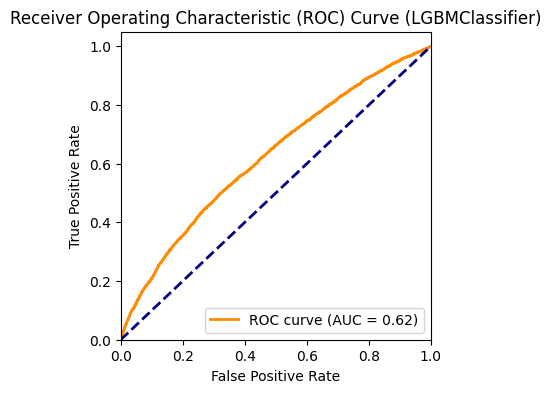

<IPython.core.display.Javascript object>

In [5]:
model = LGBMClassifier(n_jobs=-1, class_weight="balanced", use_missing=False)
final_pipe = Pipeline(steps=[("model", model)])


final_pipe.fit(X_train, y_train)
y_pred = final_pipe.predict(X_test)
y_pred_prob = final_pipe.predict_proba(X_test)[:, 1]
print("\n\n\nProbability: ", y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("\n\n\nROC_AUC score: ", roc_auc)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve (LGBMClassifier)")
plt.legend(loc="lower right")
plt.show()

<Figure size 800x800 with 0 Axes>

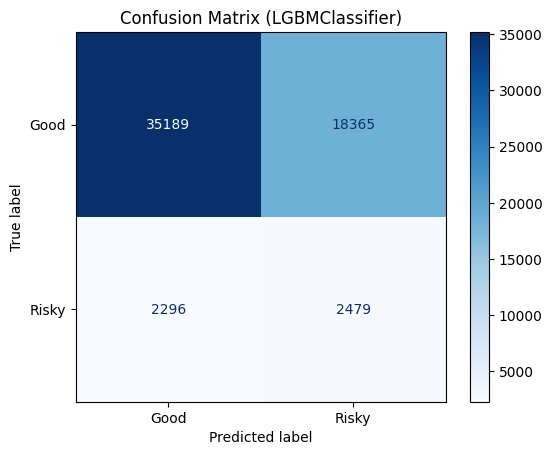

Classification report (LGBMClassifier):
---------------------------
               precision    recall  f1-score   support

        Good       0.94      0.66      0.77     53554
       Risky       0.12      0.52      0.19      4775

    accuracy                           0.65     58329
   macro avg       0.53      0.59      0.48     58329
weighted avg       0.87      0.65      0.73     58329



<IPython.core.display.Javascript object>

In [6]:
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=["Good", "Risky"])
plt.figure(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_pipe.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.xticks(np.arange(2), ["Good", "Risky"])
plt.yticks(np.arange(2), ["Good", "Risky"])
plt.title("Confusion Matrix (LGBMClassifier)")
plt.show()
print("Classification report (LGBMClassifier):\n---------------------------\n", clr)

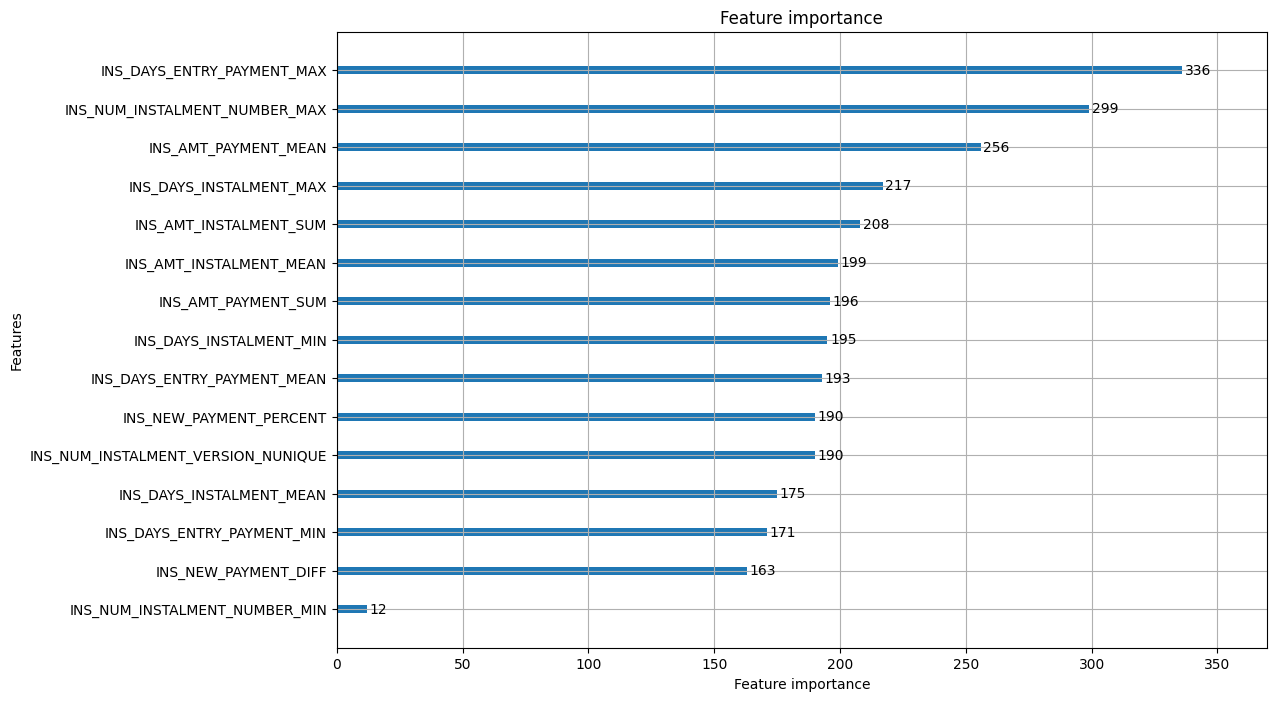

<IPython.core.display.Javascript object>

In [7]:
model_lgb = final_pipe.named_steps["model"]
lgb.plot_importance(model_lgb, figsize=(12, 8), max_num_features=15)
plt.show()

In [8]:
feature_imp = pd.DataFrame(
    sorted(zip(model_lgb.feature_importances_, X_train.columns)),
    columns=["Value", "Feature"],
)
features_df_ip = feature_imp.sort_values(by="Value", ascending=False)
selected_features_ip = list(features_df_ip[features_df_ip["Value"] >= 50]["Feature"])
selected_features_ip

['INS_DAYS_ENTRY_PAYMENT_MAX',
 'INS_NUM_INSTALMENT_NUMBER_MAX',
 'INS_AMT_PAYMENT_MEAN',
 'INS_DAYS_INSTALMENT_MAX',
 'INS_AMT_INSTALMENT_SUM',
 'INS_AMT_INSTALMENT_MEAN',
 'INS_AMT_PAYMENT_SUM',
 'INS_DAYS_INSTALMENT_MIN',
 'INS_DAYS_ENTRY_PAYMENT_MEAN',
 'INS_NEW_PAYMENT_PERCENT',
 'INS_NUM_INSTALMENT_VERSION_NUNIQUE',
 'INS_DAYS_INSTALMENT_MEAN',
 'INS_DAYS_ENTRY_PAYMENT_MIN',
 'INS_NEW_PAYMENT_DIFF']

<IPython.core.display.Javascript object>

In [9]:
# writing all into separate file:
ip_selected = ip_target_copy[["SK_ID_CURR"] + selected_features_ip]
ip_selected.to_csv("istallments_payments_selected_features.csv", index=False, quoting=QUOTE_NONNUMERIC, quotechar='"')
ip_selected.head()

,SK_ID_CURR,INS_DAYS_ENTRY_PAYMENT_MAX,INS_NUM_INSTALMENT_NUMBER_MAX,INS_AMT_PAYMENT_MEAN,INS_DAYS_INSTALMENT_MAX,INS_AMT_INSTALMENT_SUM,INS_AMT_INSTALMENT_MEAN,INS_AMT_PAYMENT_SUM,INS_DAYS_INSTALMENT_MIN,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_NEW_PAYMENT_PERCENT,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MIN,INS_NEW_PAYMENT_DIFF
0,100002,-49.0,19,11559.247070,-25.0,2.196257e+05,11559.247070,2.196257e+05,-565.0,-315.5,1.000000,2,-295.00,-587.0,0.000
1,100003,-544.0,12,64754.585938,-536.0,1.618865e+06,64754.585938,1.618865e+06,-2310.0,-1385.0,1.000000,2,-1378.00,-2324.0,0.000
2,100004,-727.0,3,7096.154785,-724.0,2.128846e+04,7096.154785,2.128846e+04,-784.0,-761.5,1.000000,2,-754.00,-795.0,0.000
3,100006,-12.0,10,62947.089844,-11.0,1.007153e+06,62947.089844,1.007153e+06,-545.0,-271.5,1.000000,2,-252.25,-575.0,0.000
4,100007,-14.0,17,12214.059570,-14.0,8.359853e+05,12666.444336,8.061279e+05,-2326.0,-1032.0,0.964285,2,-1029.00,-2318.0,29857.375


<IPython.core.display.Javascript object>